In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [3]:
df = pd.read_csv('./spam.csv')

In [4]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


<IPython.core.display.Javascript object>


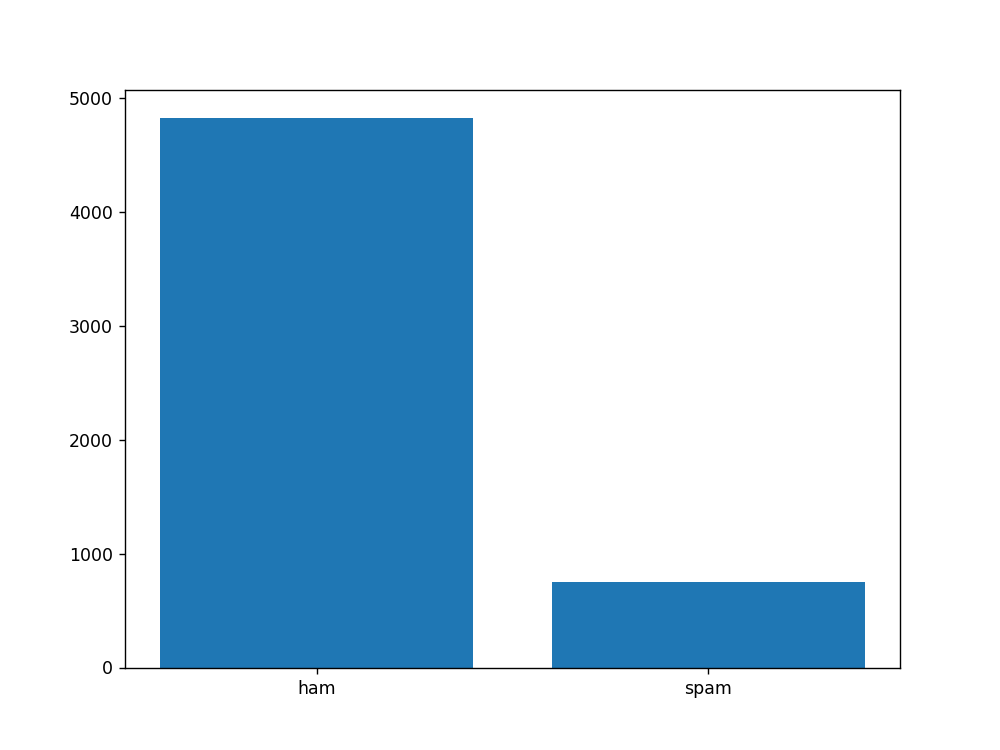

In [5]:
plt.figure(figsize=(8, 6))

x_axis = df['target'].unique()
y_axis = df['target'].value_counts()

plt.bar(x_axis, y_axis)
plt.show()

In [6]:
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

In [8]:
vect = CountVectorizer(min_df=5, ngram_range=(2, 5), analyzer='char_wb')
vect.fit(X_train)

CountVectorizer(analyzer='char_wb', min_df=5, ngram_range=(2, 5))

In [9]:
X_train_vect = vect.transform(X_train)

X_train_vect = add_feature(X_train_vect, [len(x) for x in X_train])
X_train_vect = add_feature(X_train_vect, [sum(char.isnumeric() for char in x) for x in X_train])
X_train_vect = add_feature(X_train_vect, X_train.str.count('\W'))

In [10]:
X_test_vect = vect.transform(X_test)

X_test_vect = add_feature(X_test_vect, [len(x) for x in X_test])
X_test_vect = add_feature(X_test_vect, [sum(char.isnumeric() for char in x) for x in X_test])
X_test_vect = add_feature(X_test_vect, X_test.str.count('\W'))

In [11]:
dummy_model = DummyClassifier()
dummy_model.fit(X_train_vect, y_train)
dummy_pred = dummy_model.predict(X_test_vect)

In [12]:
model = LogisticRegression(C=100, max_iter=1000)
model.fit(X_train_vect, y_train)
pred = model.predict(X_test_vect)

In [13]:
print('Dummy Classifier\n')
print(confusion_matrix(y_test, dummy_pred))

Dummy Classifier

[[973   0]
 [142   0]]


In [14]:
print('Logistic Regression\n')
print(confusion_matrix(y_test, pred))

Logistic Regression

[[970   3]
 [ 13 129]]
